In [1]:
import os
import requests
import sqlite3
import pickle
from datetime import datetime, timedelta
from datetime import timezone
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from dotenv import load_dotenv
from IPython.display import clear_output
import util
import strategies
from importlib import reload
load_dotenv()
reload(util)

<module 'util' from 'c:\\Users\\joshu\\Documents\\Github\\Trading-Bot\\Uncon Backtest\\util.py'>

In [2]:

kraken_coin_data = util.get_exchange_coins('kraken')
kraken_coin_ids = [coin['coin_id'] for coin in kraken_coin_data]
kraken_symbols = [coin['base'].lower() for coin in kraken_coin_data]
tradable_kraken_coins = util.get_tradable_kraken_coins()
all_data = util.get_all_ochl()

kraken_data = all_data[all_data['coin_id'].isin(kraken_coin_ids)]
coins_to_exclude = [
        'tether', 
        'usd-coin', 
        'true-usd', 
        'wrapped-bitcoin',
        'dai',
        'terra-luna',
        'ftx-token',
        'bora',
        'theta-fuel',
        'gifto',
        'amber',
        'cocos-bcx',
        'beldex',
        'usdc',
    ]
exclude_coins_symbol = [coin['base'].lower() for coin in kraken_coin_data if coin['coin_id'] in coins_to_exclude]
all_close_prices = util.get_col_pivot_from_all_ochl(type ='close',volume_threshold= 100000)
all_high_prices = util.get_col_pivot_from_all_ochl(type ='high', volume_threshold=100000)
all_low_prices = util.get_col_pivot_from_all_ochl(type ='low', volume_threshold=100000)
all_vol = util.get_col_pivot_from_all_ochl(type='volume' ,volume_threshold=100000)
kraken_columns = list(set(all_close_prices.columns).intersection(set(kraken_symbols))-set(exclude_coins_symbol))
all_kraken_close_prices = np.log(all_close_prices[kraken_columns])
all_kraken_high_prices = np.log(all_high_prices[kraken_columns])
all_kraken_low_prices = np.log(all_low_prices[kraken_columns])
all_kraken_vol = all_vol[kraken_columns]
kraken_ret = (util.transform_returns(kraken_data, volume_threshold=100000))
modified_ret = util.modify_extreme_ret(kraken_ret)[kraken_columns]
kraken_trading_activity = np.power(modified_ret.rolling(24, min_periods=1).std()*all_kraken_vol, 2/3)
log_trading_activity = np.log1p(kraken_trading_activity)
start_date_in_sample = '2019-01-01'
end_date_in_sample = '2023-12-31'
start_date_out_of_sample = '2024-01-01'
def get_in_sample(df):
    return df.loc[start_date_in_sample:end_date_in_sample]
def get_out_of_sample(df):
    return df.loc[start_date_out_of_sample:]
in_sample_ret = get_in_sample(modified_ret)
in_sample_close_prices = get_in_sample(all_kraken_close_prices)
in_sample_high_prices = get_in_sample(all_kraken_high_prices)
in_sample_low_prices = get_in_sample(all_kraken_close_prices)
in_sample_vol = get_in_sample(all_kraken_vol)
out_of_sample_ret = get_out_of_sample(modified_ret)
out_of_sample_close_prices = get_out_of_sample(all_kraken_close_prices)
out_of_sample_high_prices = get_out_of_sample(all_kraken_high_prices)
out_of_sample_low_prices = get_out_of_sample(all_kraken_low_prices)
out_of_sample_vol = get_out_of_sample(all_kraken_vol)

In [8]:
close_price0 = util.get_col_pivot_from_all_ochl(type='close', volume_threshold=0)

File not found. Fetching from database.


In [9]:
close_price0

symbol,$muu,$smh,5ire,aave,aca,acg,ach,ada,ai16z,aioz,...,xtz,xx,zano,zcd,zec,zerebro,zeta,zeus,zig,zth
2018-02-01 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-08 15:00:00+00:00,NaN,0.041594,0.001471,190.65,0.039020,0.000348,0.025310,0.819295,0.22349,0.309853,...,0.744602,0.045339,6.84,0.017992,33.01,0.032784,0.237199,0.282997,0.093809,0.000026
2025-03-08 16:00:00+00:00,NaN,0.041034,0.001466,189.16,0.038788,0.000348,0.025113,0.817430,0.22582,0.308340,...,0.741138,0.045320,6.74,0.016024,32.64,0.032845,0.236647,0.281944,0.092102,0.000031
2025-03-08 17:00:00+00:00,NaN,NaN,NaN,191.57,NaN,NaN,0.025026,0.812275,0.22416,NaN,...,0.739463,NaN,NaN,NaN,32.59,0.033139,NaN,0.281196,NaN,NaN
2025-03-08 18:00:00+00:00,NaN,NaN,NaN,192.86,NaN,NaN,0.025196,0.805810,NaN,NaN,...,0.742637,NaN,NaN,NaN,32.94,NaN,NaN,0.284700,NaN,NaN


## Vol EDA

In [27]:
analysis_vol = (in_sample_vol-in_sample_vol.rolling(3000, min_periods=1).mean())/in_sample_vol.rolling(3000, min_periods= 1).std()

In [19]:
len(in_sample_vol.columns)

92

## Strategy Testing

In [30]:
def persistent_market_buy(volume, ret):
    enter_signal = (volume > 1).astype(int)
    enter_signal2 = (ret > 0).astype(int)
    enter_signal = enter_signal.where(enter_signal2 == 1, 0)
    
    position = pd.DataFrame(enter_signal, index=volume.index, columns=volume.columns)
    return strategies.equal_weighting(position)

port = persistent_market_buy(analysis_vol, in_sample_ret)

Corr with BTC:  0.30171640303881647
Average Turnover:  1.002998078763815
Sharpe Ratio:  0.4673000899584313
Max Drawdown:  7.1684959377558295
Time Exposure Ratio:  0.3647544724351953
Max Drawdown Duration:  922.625 days


(1.002998078763815, 0.4673000899584313, 7.1684959377558295, 922.625)

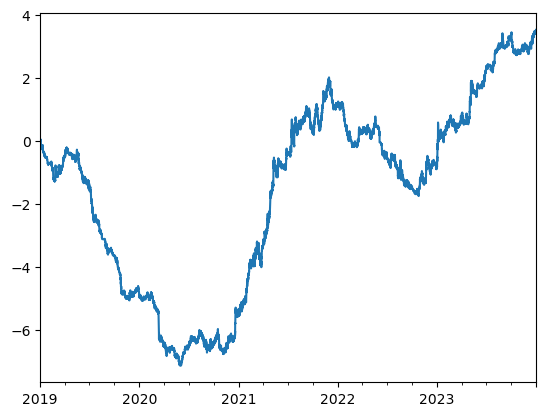

In [33]:
util.to_sharpe(port, in_sample_ret, plot = True, to_off=True)

Daily Return: 0.001
Daily Volatility: 0.0191049731745428
Annualized Sharpe Ratio for Split 1: -0.17889410136129624
Annualized Sharpe Ratio for Split 2: 2.849974456932645
Annualized Sharpe Ratio for Split 3: 2.9653335009516075
Annualized Sharpe Ratio for Split 4: -0.5709087088119709
Total Sharpe Ratio: 1.273255321439348


<Axes: >

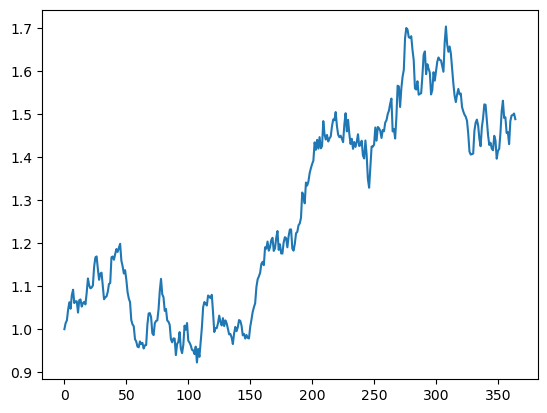

In [ ]:
import random
annualized_sharpe = 1
daily_return = 0.001
def gen_random_returns(n, mu, sigma):
    np.random.seed(random.randint(0, 10000))
    ret = np.random.normal(mu, sigma, n)
    ret = ret - np.mean(ret)
    ret = ret/np.std(ret)
    ret = ret * sigma + mu
    return ret
N = 91
splits = 4

daily_vol = daily_return*np.sqrt(365)/annualized_sharpe
print("Daily Return:", daily_return)
print("Daily Volatility:", daily_vol)

total_ret = pd.Series([0])
for i in range(splits):
    # sharpe for each quarter
    quarter = pd.Series(gen_random_returns(N, daily_return, daily_vol))
    print(f"Annualized Sharpe Ratio for Split {i+1}:", np.sqrt(365)*(quarter.mean() / quarter.std()))
    total_ret = pd.concat([total_ret, quarter], ignore_index=True)
    
print("Total Sharpe Ratio:", np.sqrt(365)*(total_ret.mean() / total_ret.std()))
(1+total_ret).cumprod().plot()

Annualized Sharpe Ratio for Split 1: 0.5258258684455411
Annualized Sharpe Ratio for Split 2: -0.39493948821798164
Annualized Sharpe Ratio for Split 3: 1.1727528113443513
Annualized Sharpe Ratio for Split 4: 1.5969929333500752
Total Sharpe Ratio: 0.7315337396974675


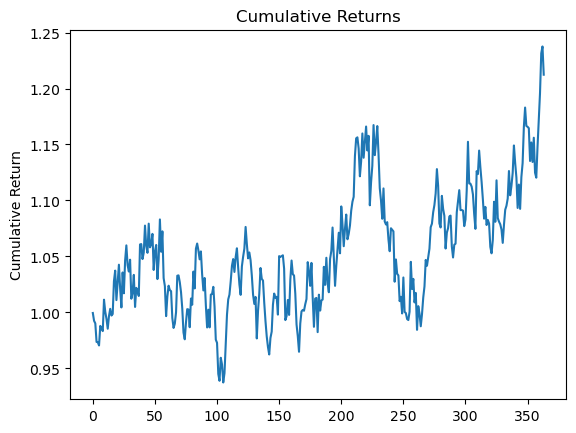

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def gen_random_returns(n, mu, sigma):
    # Generate returns without forced normalization
    np.random.seed(np.random.randint(0, 10000))
    ret = np.random.normal(mu, sigma, n)
    return ret

annualized_sharpe = 1
daily_return = 0.001
N = 91  # roughly a quarter
splits = 4

daily_vol = daily_return * np.sqrt(365) / annualized_sharpe

quarter_sharpes = []
total_ret = pd.Series(dtype=float)
for i in range(splits):
    quarter = pd.Series(gen_random_returns(N, daily_return, daily_vol))
    # Compute the raw quarterly Sharpe ratio (not annualized)
    raw_quarter_sharpe = quarter.mean() / quarter.std()
    # Annualize the quarterly Sharpe ratio
    annualized_quarter_sharpe = raw_quarter_sharpe * np.sqrt(365 / N)
    quarter_sharpes.append(annualized_quarter_sharpe)
    print(f"Annualized Sharpe Ratio for Split {i+1}: {annualized_quarter_sharpe}")
    total_ret = pd.concat([total_ret, quarter], ignore_index=True)
    
# Annualized Sharpe for the whole period (full year)
total_annual_sharpe = (total_ret.mean() / total_ret.std()) * np.sqrt(365)
print("Total Sharpe Ratio:", total_annual_sharpe)
(1+total_ret).cumprod().plot(title="Cumulative Returns")
plt.ylabel("Cumulative Return")
plt.show()


<Axes: ylabel='Count'>

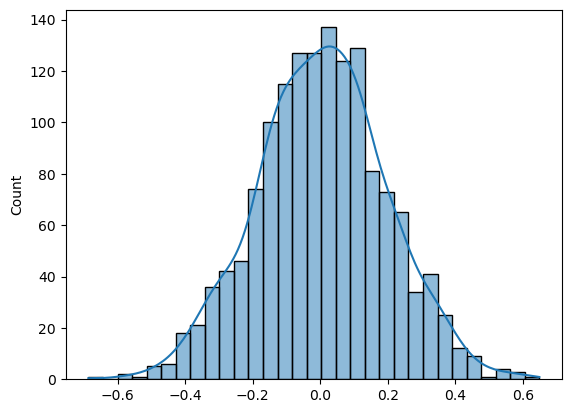

In [76]:
import seaborn as sns
sns.histplot(total_ret, kde=True)